### Importing Dataset

In [318]:
import pandas as pd
df = pd.read_csv("spam.csv", encoding='latin-1')

### Exploratory Data Analysis

In [319]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
23,ham,Aft i finish my lunch then i go str down lor. ...,NaN,NaN,NaN
230,ham,Get down in gandhipuram and walk to cross cut ...,NaN,NaN,NaN
648,ham,No prob. I will send to your email.,NaN,NaN,NaN
1224,spam,You are a winner U have been specially selecte...,NaN,NaN,NaN
4612,ham,How much you got for cleaning,NaN,NaN,NaN


In [320]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [321]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [322]:
#removal of redundant columns
df = df.drop(columns={'Unnamed: 2','Unnamed: 3','Unnamed: 4'})

In [323]:
#renaming columns
df = df.rename(columns={'v1':'target','v2':'text'})

In [324]:
df.sample(5)

,target,text
4280,ham,"Wn u r hurt by d prsn who s close 2 u, do figh..."
968,ham,Are you willing to go for aptitude class.
5062,ham,Ok i also wan 2 watch e 9 pm show...
1069,ham,Jus finish bathing...
4023,ham,Wat time Ì_ wan today?


In [325]:
#unqiue categories of target
df['target'].unique().tolist()

['ham', 'spam']

In [326]:
#number of rows in each category
df['target'].value_counts()

ham     4825
spam     747
Name: target, dtype: int64

### Dataset Visualization

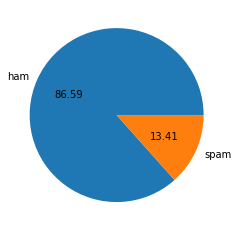

In [327]:
import matplotlib.pyplot as plt

#pie chart
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct='%.2f')
plt.show()

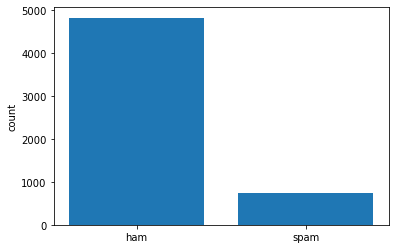

In [328]:
#bar graph
plt.bar(df['target'].unique(),df['target'].value_counts())
plt.ylabel("count")
plt.show()

In [329]:
df['text_len'] = df['text'].apply(len)
df.head()

,target,text,text_len
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


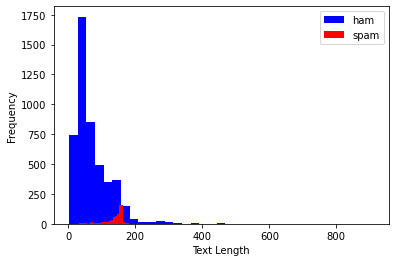

In [330]:
df[df['target']=='ham'].text_len.plot(bins=35,kind='hist',color='blue',label='ham')
df[df['target']=='spam'].text_len.plot(bins=35,kind='hist',color='red',label='spam')
plt.legend()
plt.xlabel("Text Length")
plt.show()

In [331]:
df = df.drop(columns={'text_len'})

### Dataset Preprocessing

In [332]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [333]:
#one_hot_encoding the target column
onehot = pd.get_dummies(df['target'])
df = pd.concat([df, onehot], axis=1)
df = df.drop('target',axis=1)
df.head()

,text,ham,spam
0,"Go until jurong point, crazy.. Available only ...",1,0
1,Ok lar... Joking wif u oni...,1,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,0,1
3,U dun say so early hor... U c already then say...,1,0
4,"Nah I don't think he goes to usf, he lives aro...",1,0


In [334]:
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

#removing non string values
df['text'] = df['text'].fillna('').astype(str)

df.head()

,text,ham,spam
0,"Go until jurong point, crazy.. Available only ...",1,0
1,Ok lar... Joking wif u oni...,1,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,0,1
3,U dun say so early hor... U c already then say...,1,0
4,"Nah I don't think he goes to usf, he lives aro...",1,0


In [335]:
#sentence segmentation
df['text'] = df['text'].apply(lambda x: sent_tokenize(x))
df.head()

,text,ham,spam
0,"[Go until jurong point, crazy.., Available onl...",1,0
1,"[Ok lar..., Joking wif u oni...]",1,0
2,[Free entry in 2 a wkly comp to win FA Cup fin...,0,1
3,[U dun say so early hor... U c already then sa...,1,0
4,"[Nah I don't think he goes to usf, he lives ar...",1,0


In [336]:
import re

def Clean(Text):
    data = re.sub('[^a-zA-Z]', ' ', Text) #Replacing all non-alphabetic characters with a space
    data = data.lower() #converting to lowecase
    data = data.split()
    data = ' '.join(data)
    return data

df["text"] = df["text"].astype(str)

df["text"] = df["text"].apply(Clean)

#word tokenization
df["text"]=df.apply(lambda row: nltk.word_tokenize(row["text"]), axis=1)

df.head()

,text,ham,spam
0,"[go, until, jurong, point, crazy, available, o...",1,0
1,"[ok, lar, joking, wif, u, oni]",1,0
2,"[free, entry, in, a, wkly, comp, to, win, fa, ...",0,1
3,"[u, dun, say, so, early, hor, u, c, already, t...",1,0
4,"[nah, i, don, t, think, he, goes, to, usf, he,...",1,0


In [337]:
#stopwords removal
from nltk.corpus import stopwords

def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    texts = [word for word in text if word not in stop_words]
    return texts

df['text'] = df['text'].apply(remove_stopwords)

df.head()

,text,ham,spam
0,"[go, jurong, point, crazy, available, bugis, n...",1,0
1,"[ok, lar, joking, wif, u, oni]",1,0
2,"[free, entry, wkly, comp, win, fa, cup, final,...",0,1
3,"[u, dun, say, early, hor, u, c, already, say]",1,0
4,"[nah, think, goes, usf, lives, around, though]",1,0


In [338]:
#lemmatization
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

def lemmatize_word(text):
    lemmas = [wnl.lemmatize(word, pos='v') for word in text]
    return lemmas

df["text"] = df["text"].apply(lemmatize_word)
df.head()

,text,ham,spam
0,"[go, jurong, point, crazy, available, bugis, n...",1,0
1,"[ok, lar, joke, wif, u, oni]",1,0
2,"[free, entry, wkly, comp, win, fa, cup, final,...",0,1
3,"[u, dun, say, early, hor, u, c, already, say]",1,0
4,"[nah, think, go, usf, live, around, though]",1,0
